In [120]:
import requests

In [121]:
import pandas as pd

In [122]:
import matplotlib.pyplot as plt

In [123]:
response = requests.get("http://apiv3.iucnredlist.org/api/v3/country/getspecies/AZ?token=9bb4facb6d23f48efbf424bb05c0c1ef1cf6f468393bc745d42179ac4aca5fee")

In [124]:
azerbaijan_species = response.json()

In [125]:
azerbaijan_df = pd.DataFrame(azerbaijan_species["result"])

In [126]:
azerbaijan_df

,taxonid,scientific_name,subspecies,rank,subpopulation,category
0,42293,Abies nordmanniana,None,None,None,LC
1,196098,Abies nordmanniana subsp. nordmanniana,nordmanniana,subsp.,None,LC
2,48839409,Ablepharus bivittatus,None,None,None,LC
3,135696,Abramis brama,None,None,None,LC
4,22725044,Acanthis flammea,None,None,None,LC
...,...,...,...,...,...,...
1158,22692663,Zapornia parva,None,None,None,LC
1159,22692667,Zapornia pusilla,None,None,None,LC
1160,31303,Zelkova carpinifolia,None,None,None,VU
1161,39482,Zerynthia caucasica,None,None,None,VU


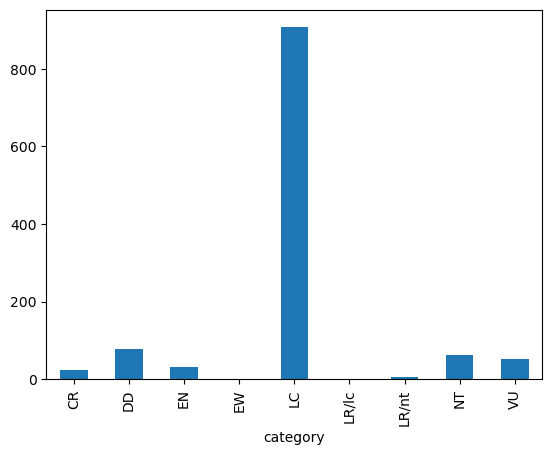

In [127]:
categories_count_az = azerbaijan_df.groupby("category").count()
category_plot = categories_count_az["taxonid"].plot(kind = 'bar')


In [128]:
response = requests.get("http://apiv3.iucnredlist.org/api/v3/region/list?token=9bb4facb6d23f48efbf424bb05c0c1ef1cf6f468393bc745d42179ac4aca5fee")
regions = response.json()
df2 = pd.DataFrame(regions["results"])
df2

,name,identifier
0,Northeastern Africa,northeastern_africa
1,Eastern Africa,eastern_africa
2,Global,global
3,Western Africa,western_africa
4,Northern Africa,northern_africa
5,Central Africa,central_africa
6,Pan-Africa,pan-africa
7,Southern Africa,southern_africa
8,Mediterranean,mediterranean
9,Europe,europe


In [129]:
response = requests.get("http://apiv3.iucnredlist.org/api/v3/species/page/0?token=9bb4facb6d23f48efbf424bb05c0c1ef1cf6f468393bc745d42179ac4aca5fee")
global_assessment_species = response.json()
global_sample_species_df = pd.DataFrame(global_assessment_species["result"])
global_sample_species_df

,taxonid,kingdom_name,phylum_name,class_name,order_name,family_name,genus_name,scientific_name,taxonomic_authority,infra_rank,infra_name,population,category,main_common_name
0,3,ANIMALIA,MOLLUSCA,GASTROPODA,STYLOMMATOPHORA,ENDODONTIDAE,Aaadonta,Aaadonta angaurana,"Solem, 1976",None,None,None,CR,None
1,4,ANIMALIA,MOLLUSCA,GASTROPODA,STYLOMMATOPHORA,ENDODONTIDAE,Aaadonta,Aaadonta constricta,"(Semper, 1874)",None,None,None,EN,None
2,5,ANIMALIA,MOLLUSCA,GASTROPODA,STYLOMMATOPHORA,ENDODONTIDAE,Aaadonta,Aaadonta fuscozonata,"(Beddome, 1889)",None,None,None,EN,None
3,6,ANIMALIA,MOLLUSCA,GASTROPODA,STYLOMMATOPHORA,ENDODONTIDAE,Aaadonta,Aaadonta irregularis,"Semper, 1874",None,None,None,CR,None
4,7,ANIMALIA,MOLLUSCA,GASTROPODA,STYLOMMATOPHORA,ENDODONTIDAE,Aaadonta,Aaadonta kinlochi,"Solem, 1976",None,None,None,CR,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,31578,PLANTAE,TRACHEOPHYTA,MAGNOLIOPSIDA,MYRTALES,MYRTACEAE,Eugenia,Eugenia klossii,Ridley,None,None,None,CR,None
9996,31579,PLANTAE,TRACHEOPHYTA,MAGNOLIOPSIDA,MYRTALES,MYRTACEAE,Eugenia,Eugenia koordersiana,King,None,None,None,LR/lc,None
9997,31580,PLANTAE,TRACHEOPHYTA,MAGNOLIOPSIDA,MYRTALES,MYRTACEAE,Eugenia,Eugenia laevicaulis,Duthie,None,None,None,LR/lc,None
9998,31581,PLANTAE,TRACHEOPHYTA,MAGNOLIOPSIDA,MYRTALES,MYRTACEAE,Eugenia,Eugenia myriantha,King,None,None,None,DD,None


In [167]:
contingency_table_class_category = pd.crosstab(global_sample_species_df['class_name'], global_sample_species_df['category'], margins=True)
print(contingency_table_class_category)

category              CR    DD    EN  EW   EX    LC  LR/cd  LR/lc  LR/nt   NT  \
class_name                                                                      
ACTINOPTERYGII       190   121   212  10   52   211      0      3      7   81   
AMPHIBIA              42    21    57   0    9    39      0      0      0   24   
ANTHOZOA               1     0     0   0    0     0      0      0      0    0   
ARACHNIDA              0     7     1   0    0     0      0      0      0    1   
BIVALVIA              53     7    39   0   31    23      4      1     30   11   
BRANCHIOPODA           6     1    10   0    0     0      1      1      1    0   
CEPHALASPIDOMORPHI     0     1     2   0    0     6      0      0      0    0   
CHILOPODA              0     0     0   0    0     0      0      0      0    0   
CHONDRICHTHYES         2     1     4   0    0     0      0      0      0    1   
CLITELLATA             0     2     2   0    0     0      0      0      1    1   
ECHINOIDEA             0    

In [168]:
from scipy.stats import chi2_contingency
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table_class_category)
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)

Chi-square statistic: 5172.104691582565
P-value: 0.0
Degrees of freedom: 308
Expected frequencies:
[[1.193484e+02 1.304052e+02 1.584808e+02 3.577200e+00 5.214040e+01
  3.012436e+02 4.986400e+00 1.214080e+01 2.590760e+01 6.319720e+01
  2.125724e+02 1.084000e+03]
 [2.521290e+01 2.754870e+01 3.347980e+01 7.557000e-01 1.101490e+01
  6.363910e+01 1.053400e+00 2.564800e+00 5.473100e+00 1.335070e+01
  4.490690e+01 2.290000e+02]
 [3.303000e-01 3.609000e-01 4.386000e-01 9.900000e-03 1.443000e-01
  8.337000e-01 1.380000e-02 3.360000e-02 7.170000e-02 1.749000e-01
  5.883000e-01 3.000000e+00]
 [1.981800e+00 2.165400e+00 2.631600e+00 5.940000e-02 8.658000e-01
  5.002200e+00 8.280000e-02 2.016000e-01 4.302000e-01 1.049400e+00
  3.529800e+00 1.800000e+01]
 [2.466240e+01 2.694720e+01 3.274880e+01 7.392000e-01 1.077440e+01
  6.224960e+01 1.030400e+00 2.508800e+00 5.353600e+00 1.305920e+01
  4.392640e+01 2.240000e+02]
 [4.624200e+00 5.052600e+00 6.140400e+00 1.386000e-01 2.020200e+00
  1.167180e+01 1.93

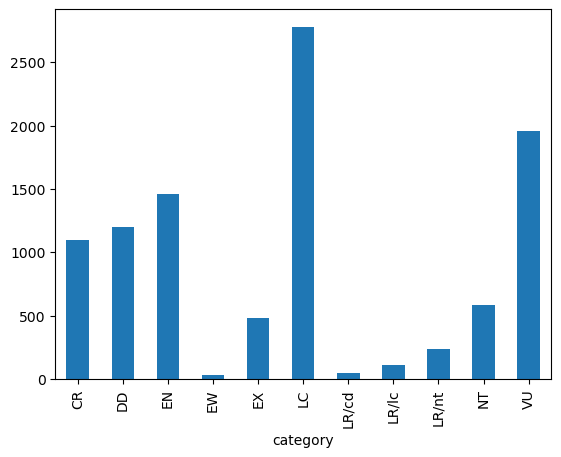

In [143]:
categories_count_global_sample = global_sample_species_df.groupby("category").count()
categories_plot = categories_count_global_sample["taxonid"].plot(kind = 'bar')

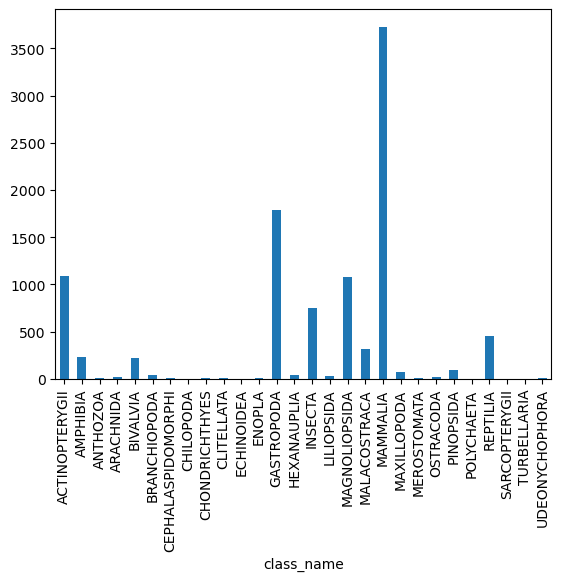

In [144]:
classes_count_global_sample = global_sample_species_df.groupby("class_name").count()
classes_plot = classes_count_global_sample["taxonid"].plot(kind = 'bar')

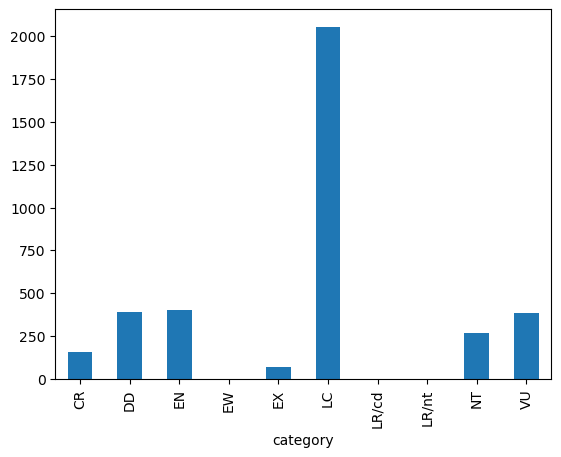

In [131]:
mammalia = df3[df3["class_name"] == "MAMMALIA"]
counts_mammalia = mammalia.groupby('category').count()['taxonid']
categories = counts_mammalia.plot(kind = 'bar')

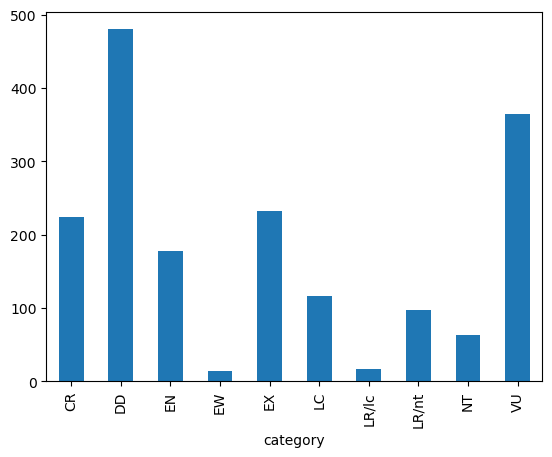

In [132]:
gastropoda = df3[df3["class_name"] == "GASTROPODA"]
counts_gastropoda = gastropoda.groupby('category').count()['taxonid']
categories = counts_gastropoda.plot(kind = 'bar')

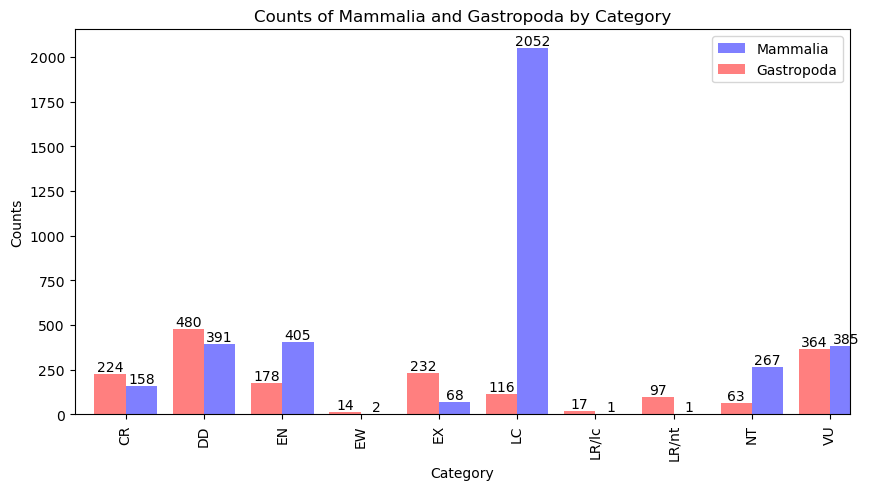

In [133]:
fig, ax = plt.subplots(figsize=(10, 5))
classes_category_plot = counts_mammalia.plot(kind='bar', color='blue', alpha=0.5, position=0, width=0.4)
counts_gastropoda.plot(kind='bar', color='red', alpha=0.5, position=1, width=0.4, ax=classes_category_plot)
classes_category_plot.set_xlabel('Category')
classes_category_plot.set_ylabel('Counts')
classes_category_plot.legend(['Mammalia', 'Gastropoda'])
classes_category_plot.set_title('Counts of Mammalia and Gastropoda by Category')
for i in classes_category_plot.containers:
    classes_category_plot.bar_label(i, label_type='edge', fontsize=10)
    
plt.savefig('classes_counts_of_categories.png')

In [134]:
response = requests.get("http://apiv3.iucnredlist.org/api/v3/species/region/europe/page/0?token=9bb4facb6d23f48efbf424bb05c0c1ef1cf6f468393bc745d42179ac4aca5fee")
european_assessment_species = response.json()
european_sample_species_df = pd.DataFrame(european_assessment_species["result"])
european_sample_species_df

,taxonid,kingdom_name,phylum_name,class_name,order_name,family_name,genus_name,scientific_name,taxonomic_authority,infra_rank,infra_name,population,category,main_common_name
0,59,ANIMALIA,MOLLUSCA,GASTROPODA,STYLOMMATOPHORA,VALLONIIDAE,Acanthinula,Acanthinula spinifera,"Mousson, 1872",None,None,None,DD,None
1,81,ANIMALIA,CHORDATA,ACTINOPTERYGII,SALMONIFORMES,SALMONIDAE,Salmo,Salmo ohridanus,"Steindachner, 1892",None,None,None,VU,None
2,215,ANIMALIA,MOLLUSCA,GASTROPODA,ARCHITAENIOGLOSSA,ACICULIDAE,Acicula,Acicula norrisi,"E. Gittenberger &amp; Boeters, 1977",None,None,None,VU,None
3,217,ANIMALIA,MOLLUSCA,GASTROPODA,ARCHITAENIOGLOSSA,ACICULIDAE,Acicula,Acicula hausdorfi,"Boeters, Gittenberger &amp; Subai, 1989",None,None,None,NT,None
4,224,ANIMALIA,CHORDATA,ACTINOPTERYGII,ACIPENSERIFORMES,ACIPENSERIDAE,Acipenser,Acipenser naccarii,"Bonaparte, 1836",None,None,None,CR,Adriatic Sturgeon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19199083,ANIMALIA,ARTHROPODA,INSECTA,HYMENOPTERA,MEGACHILIDAE,Hoplitis,Hoplitis annulata,"(Latreille, 1811)",None,None,None,LC,None
9996,19199084,ANIMALIA,ARTHROPODA,INSECTA,HYMENOPTERA,MEGACHILIDAE,Stelis,Stelis signata,"(Latreille, 1809)",None,None,None,LC,None
9997,19199085,ANIMALIA,ARTHROPODA,INSECTA,HYMENOPTERA,MEGACHILIDAE,Coelioxys,Coelioxys rufescens,"Lepeletier & Audinet-Serville, 1825",None,None,None,LC,None
9998,19199086,ANIMALIA,ARTHROPODA,INSECTA,HYMENOPTERA,HALICTIDAE,Sphecodes,Sphecodes longuloides,"Blüthgen, 1923",None,None,None,DD,None


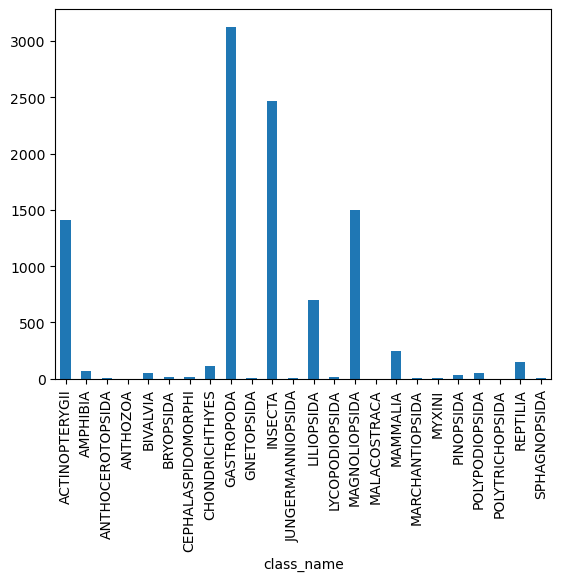

In [138]:
classes_count_european_sample = european_sample_species_df.groupby("class_name").count()
classes_plot = classes_count_european_sample["taxonid"].plot(kind = 'bar')

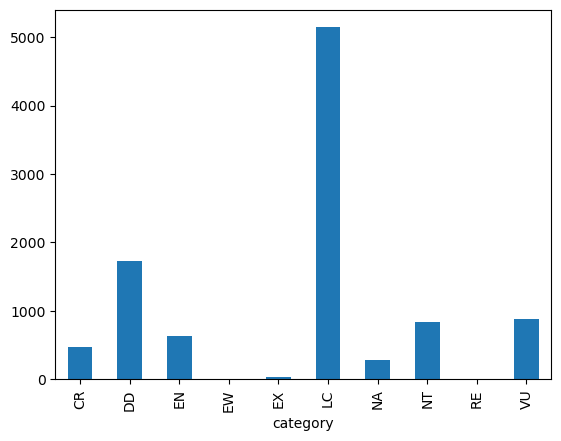

In [137]:
categories_count_european_sample = european_sample_species_df.groupby("category").count()
categories_plot = categories_count_european_sample["taxonid"].plot(kind = 'bar')

In [156]:
european_sample_species_df[european_sample_species_df["category"] == "RE"]


,taxonid,kingdom_name,phylum_name,class_name,order_name,family_name,genus_name,scientific_name,taxonomic_authority,infra_rank,infra_name,population,category,main_common_name
253,8097,ANIMALIA,CHORDATA,MAMMALIA,CETARTIODACTYLA,ESCHRICHTIIDAE,Eschrichtius,Eschrichtius robustus,"(Lilljeborg, 1861)",None,None,None,RE,Gray Whale
6322,172217,PLANTAE,TRACHEOPHYTA,LILIOPSIDA,ASPARAGALES,AMARYLLIDACEAE,Allium,Allium jubatum,J.F.Macbr.,None,None,None,RE,None


In [163]:
categories_count_european_sample_perc

category
CR     4.66
DD    17.30
EN     6.31
EW     0.04
EX     0.27
LC    51.44
NA     2.81
NT     8.40
RE     0.02
VU     8.75
Name: taxonid, dtype: float64

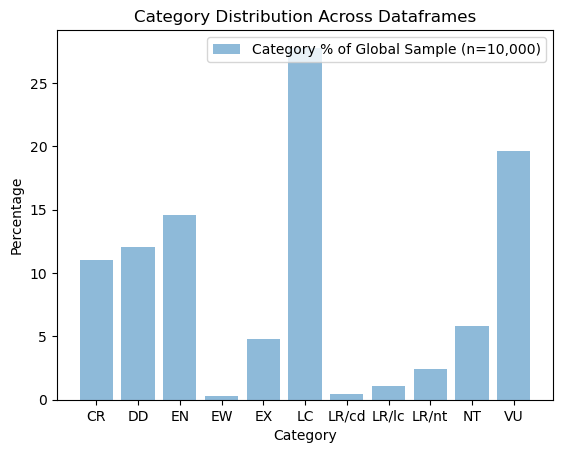

In [160]:
# categories_count_global_sample['category'].replace({'LR/cd': 'CD', 'LR/lc': 'LC', 'LR/nt' : 'NT'}, inplace=True)
# categories_count_european_sample['category'].replace({'NA': 'LC', 'RE': 'EX'}, inplace=True)
# categories_count_european_sample = categories_count_european_sample.append(pd.DataFrame({'category' : "CD"}))
# df3['category'].replace({'NA': 'LC', 'RE': 'EX'}, inplace=True)

categories_count_global_sample_perc = categories_count_global_sample['taxonid'] / len(global_sample_species_df) * 100
categories_count_european_sample_perc = categories_count_european_sample['taxonid'] / len(european_sample_species_df) * 100
categories_count_az_perc = categories_count_az['taxonid'] / len(azerbaijan_df) * 100

plt.bar(categories_count_global_sample_perc.index, categories_count_global_sample_perc.values, alpha=0.5, label='Category % of Global Sample (n=10,000)')
# plt.bar(categories_count_european_sample.index, categories_count_european_sample.values, alpha=0.5, label='Category % of European Sample (n=10,000)')
# plt.bar(categories_count_az.index, categories_count_az.values, alpha=0.5, label='Category % of Azerbaijan Sample (n=1,163)')
plt.title('Category Distribution Across Dataframes')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.legend()
plt.show()

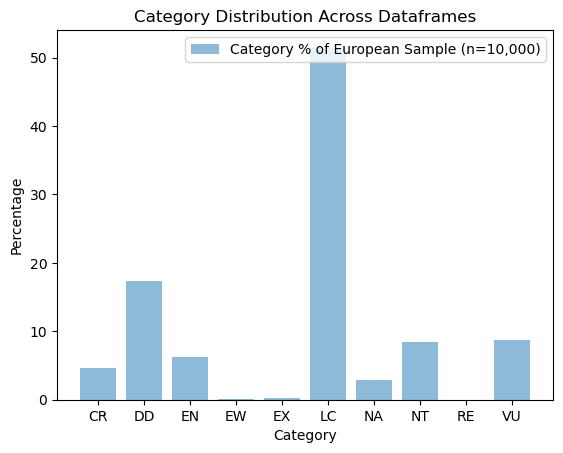

In [164]:
plt.bar(categories_count_european_sample_perc.index, categories_count_european_sample_perc.values, alpha=0.5, label='Category % of European Sample (n=10,000)')
# plt.bar(categories_count_az.index, categories_count_az.values, alpha=0.5, label='Category % of Azerbaijan Sample (n=1,163)')
plt.title('Category Distribution Across Dataframes')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.legend()
plt.show()

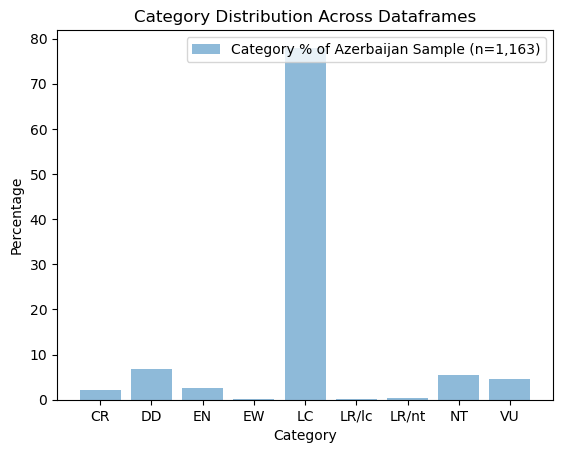

In [165]:
plt.bar(categories_count_az_perc.index, categories_count_az_perc.values, alpha=0.5, label='Category % of Azerbaijan Sample (n=1,163)')
plt.title('Category Distribution Across Dataframes')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.legend()
plt.show()

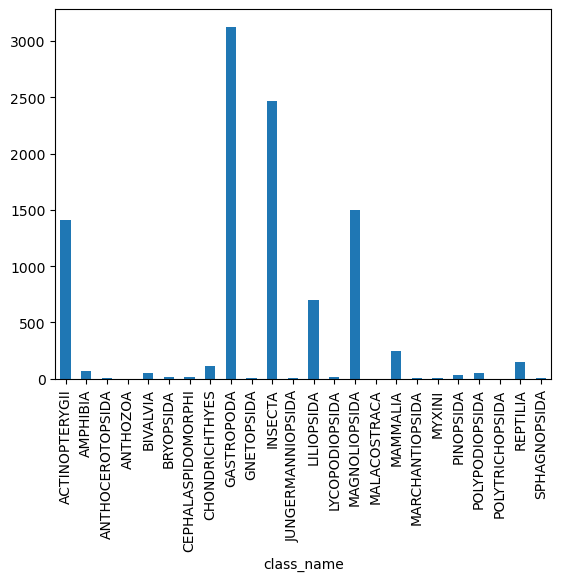

In [119]:
classes = european_sample_species_df.groupby("class_name").count()
classes_plot = classes["taxonid"].plot(kind = 'bar')

In [ ]:
from scipy.stats import chi2_contingency

# Construct a 3x10 contingency table
contingency_table = [[10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                     [15, 25, 35, 45, 55, 65, 75, 85, 95, 105],
                     [20, 30, 40, 50, 60, 70, 80, 90, 100, 110]]

# Perform chi-square test of independence
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Print results
print("Chi-square statistic: {:.2f}".format(chi2_stat))
print("P-value: {:.4f}".format(p_val))
print("Degrees of freedom: {}".format(dof))
print("Expected frequencies:\n", expected)

In [41]:
response = requests.get("http://apiv3.iucnredlist.org/api/v3/speciescount?token=9bb4facb6d23f48efbf424bb05c0c1ef1cf6f468393bc745d42179ac4aca5fee")
global_species_count = response.json()
global_species_count

{'count': '153732',
 'note1': 'Above total includes species, subspecies and subpopulation',
 'speciescount': '150388',
 'note2': 'Above total includes species only'}

In [39]:
response = requests.get("http://apiv3.iucnredlist.org/api/v3/speciescount/region/europe?token=9bb4facb6d23f48efbf424bb05c0c1ef1cf6f468393bc745d42179ac4aca5fee")
european_species_count = response.json()
european_species_count

{'count': '16226',
 'note1': 'Above total includes species, subspecies and subpopulation',
 'speciescount': '16124',
 'note2': 'Above total includes species only',
 'region_identifier': 'europe'}

In [50]:
response = requests.get("http://apiv3.iucnredlist.org/api/v3/species/category/VU?token=9bb4facb6d23f48efbf424bb05c0c1ef1cf6f468393bc745d42179ac4aca5fee")
vulnerable_species = response.json()
df5 = pd.DataFrame(vulnerable_species["result"])
df5

,taxonid,scientific_name,subspecies,rank,subpopulation
0,36563,Abarema abbottii,None,None,None
1,30843,Abarema bigemina,None,None,None
2,36568,Abarema centiflora,None,None,None
3,36552,Abarema cochleata var. moniliformis,moniliformis,var.,None
4,36545,Abarema curvicarpa var. rodriguesii,rodriguesii,var.,None
...,...,...,...,...,...
17223,37415,Zygogynum cristatum,None,None,None
17224,156755505,Zygogynum vieillardii,None,None,None
17225,129871949,Zygoruellia richardii,None,None,None
17226,23326,Zyzomys maini,None,None,None


In [51]:
response = requests.get("http://apiv3.iucnredlist.org/api/v3/species/category/LRlc?token=9bb4facb6d23f48efbf424bb05c0c1ef1cf6f468393bc745d42179ac4aca5fee")
LowerRiskLeastConcern_species = response.json()
df6 = pd.DataFrame(LowerRiskLeastConcern_species["result"])
df6

,taxonid,scientific_name,subspecies,rank,subpopulation
0,36549,Abarema commutata,None,None,None
1,34283,Actinodaphne malaccensis,None,None,None
2,36797,Aegiphila cordifolia,None,None,None
3,36799,Aegiphila sordida,None,None,None
4,37432,Agarista mexicana var. pinetorum,pinetorum,var.,None
...,...,...,...,...,...
494,31726,Xylopia elliptica,None,None,None
495,31727,Xylopia magna,None,None,None
496,35089,Xylosma suaveolens subsp. gracile,gracile,subsp.,None
497,35090,Xylosma suaveolens subsp. pubigerum,pubigerum,subsp.,None


In [53]:
response = requests.get("http://apiv3.iucnredlist.org/api/v3/species/loxodonta%20africana?token=9bb4facb6d23f48efbf424bb05c0c1ef1cf6f468393bc745d42179ac4aca5fee")
loxodonta_africana_global = response.json()
df7 = pd.DataFrame(loxodonta_africana_global["result"])
df7

,taxonid,scientific_name,kingdom,phylum,class,order,family,genus,main_common_name,authority,...,aoo_km2,eoo_km2,elevation_upper,elevation_lower,depth_upper,depth_lower,errata_flag,errata_reason,amended_flag,amended_reason
0,181008073,Loxodonta africana,ANIMALIA,CHORDATA,MAMMALIA,PROBOSCIDEA,ELEPHANTIDAE,Loxodonta,African Savanna Elephant,"(Blumenbach, 1797)",...,None,None,2500,0,None,None,None,None,True,The listing of the African Savana Elephant was...


In [54]:
response = requests.get("http://apiv3.iucnredlist.org/api/v3/species/Fratercula%20arctica/region/europe?token=9bb4facb6d23f48efbf424bb05c0c1ef1cf6f468393bc745d42179ac4aca5fee")
fratercula_arctica_european_assessment = response.json()
df8 = pd.DataFrame(fratercula_arctica_european_assessment["result"])
df8

,taxonid,scientific_name,kingdom,phylum,class,order,family,genus,main_common_name,authority,...,aoo_km2,eoo_km2,elevation_upper,elevation_lower,depth_upper,depth_lower,errata_flag,errata_reason,amended_flag,amended_reason
0,22694927,Fratercula arctica,ANIMALIA,CHORDATA,AVES,CHARADRIIFORMES,ALCIDAE,Fratercula,Atlantic Puffin,"(Linnaeus, 1758)",...,None,None,None,None,None,None,None,None,None,None


In [57]:
response = requests.get("http://apiv3.iucnredlist.org/api/v3/species/history/name/Loxodonta%20africana?token=9bb4facb6d23f48efbf424bb05c0c1ef1cf6f468393bc745d42179ac4aca5fee")
loxodonta_historical_assessments_global = response.json()
df9 = pd.DataFrame(loxodonta_historical_assessments_global)
df9

,name,result
0,Loxodonta africana,"{'year': '2022', 'assess_year': '2020', 'code'..."
1,Loxodonta africana,"{'year': '2021', 'assess_year': '2020', 'code'..."


In [61]:
response = requests.get("http://apiv3.iucnredlist.org/api/v3/species/history/name/Ursus%20maritimus/region/europe?token=9bb4facb6d23f48efbf424bb05c0c1ef1cf6f468393bc745d42179ac4aca5fee")
ursus_historical_assessments_european = response.json()
df10 = pd.DataFrame(ursus_historical_assessments_european)
df10

,name,region_identifier,result
0,Ursus maritimus,europe,"{'year': '2007', 'assess_year': '2006', 'code'..."


In [63]:
response = requests.get("http://apiv3.iucnredlist.org/api/v3/threats/species/name/Loxodonta%20africana?token=9bb4facb6d23f48efbf424bb05c0c1ef1cf6f468393bc745d42179ac4aca5fee")
loxodonta_threats_global = response.json()
df11 = pd.DataFrame(loxodonta_threats_global["result"])
df11

,code,title,timing,scope,severity,score,invasive
0,1.1,Housing & urban areas,Ongoing,Minority (<50%),Unknown,Unknown,None
1,11.2,Droughts,Ongoing,Majority (50-90%),"Slow, Significant Declines",Medium Impact: 6,None
2,11.5,Other impacts,Ongoing,Whole (>90%),Unknown,Unknown,None
3,1.2,Commercial & industrial areas,Ongoing,Minority (<50%),Unknown,Unknown,None
4,1.3,Tourism & recreation areas,Ongoing,Minority (<50%),Unknown,Unknown,None
5,2.1,Annual & perennial non-timber crops,Ongoing,Majority (50-90%),Unknown,Unknown,None
6,2.1,Annual & perennial non-timber crops,Ongoing,Minority (<50%),Unknown,Unknown,None
7,2.1.1,Shifting agriculture,Ongoing,Majority (50-90%),Unknown,Unknown,None
8,2.1.2,Small-holder farming,Ongoing,Minority (<50%),Unknown,Unknown,None
9,2.1.3,Agro-industry farming,Ongoing,Minority (<50%),Unknown,Unknown,None


In [66]:
response = requests.get("http://apiv3.iucnredlist.org/api/v3/threats/species/name/Fratercula%20arctica/region/europe?token=9bb4facb6d23f48efbf424bb05c0c1ef1cf6f468393bc745d42179ac4aca5fee")
fratercula_threats_european = response.json()
df12 = pd.DataFrame(fratercula_threats_european["result"])
df12

,code,title,timing,scope,severity,score,invasive
0,11.1,Habitat shifting & alteration,Ongoing,Unknown,Unknown,Unknown,None
1,11.3,Temperature extremes,Ongoing,Unknown,Unknown,Unknown,None
2,11.4,Storms & flooding,Ongoing,Unknown,Rapid Declines,Unknown,None
3,11.5,Other impacts,Ongoing,Unknown,Unknown,Unknown,None
4,3.3,Renewable energy,Ongoing,Minority (<50%),Causing/Could cause fluctuations,Low Impact: 5,None
5,5.1,Hunting & trapping terrestrial animals,Ongoing,Minority (<50%),"Slow, Significant Declines",Low Impact: 5,None
6,5.1.1,Intentional use (species is the target),Ongoing,Minority (<50%),"Slow, Significant Declines",Low Impact: 5,None
7,5.4,Fishing & harvesting aquatic resources,Ongoing,Unknown,Rapid Declines,Unknown,None
8,5.4.4,Unintentional effects: (large scale) [harvest],Ongoing,Unknown,Rapid Declines,Unknown,None
9,8.1,Invasive non-native/alien species/diseases (Ne...,Ongoing,Majority (50-90%),"Slow, Significant Declines",Medium Impact: 6,Neovison vison


In [67]:
response = requests.get("http://apiv3.iucnredlist.org/api/v3/habitats/species/name/Loxodonta%20africana?token=9bb4facb6d23f48efbf424bb05c0c1ef1cf6f468393bc745d42179ac4aca5fee")
loxodonta_habitats_global = response.json()
df13 = pd.DataFrame(loxodonta_habitats_global["result"])
df13

,code,habitat,suitability,season,majorimportance
0,1.5,Forest - Subtropical/Tropical Dry,Suitable,None,Yes
1,1.6,Forest - Subtropical/Tropical Moist Lowland,Suitable,None,No
2,1.7,Forest - Subtropical/Tropical Mangrove Vegetat...,Suitable,None,No
3,1.8,Forest - Subtropical/Tropical Swamp,Suitable,None,No
4,1.9,Forest - Subtropical/Tropical Moist Montane,Suitable,None,No
5,2.1,Savanna - Dry,Suitable,None,Yes
6,2.2,Savanna - Moist,Suitable,None,Yes
7,3.5,Shrubland - Subtropical/Tropical Dry,Suitable,None,Yes
8,3.6,Shrubland - Subtropical/Tropical Moist,Suitable,None,Yes
9,4.5,Grassland - Subtropical/Tropical Dry,Suitable,None,Yes


In [68]:
response = requests.get("http://apiv3.iucnredlist.org/api/v3/habitats/species/name/Ursus%20maritimus/region/europe?token=9bb4facb6d23f48efbf424bb05c0c1ef1cf6f468393bc745d42179ac4aca5fee")
ursus_habitat_europe = response.json()
df14 = pd.DataFrame(ursus_habitat_europe["result"])
df14

,code,habitat,suitability,season,majorimportance
0,12.1,Marine Intertidal - Rocky Shoreline,Suitable,None,None
1,12.2,Marine Intertidal - Sandy Shoreline and/or Bea...,Suitable,None,None
2,12.3,Marine Intertidal - Shingle and/or Pebble Shor...,Suitable,None,None
3,3.1,Shrubland - Subarctic,Marginal,None,None
4,9.1,Marine Neritic - Pelagic,Suitable,None,None
5,9.10,Marine Neritic - Estuaries,Suitable,None,None


In [71]:
response = requests.get("http://apiv3.iucnredlist.org/api/v3/measures/species/name/Loxodonta%20africana?token=9bb4facb6d23f48efbf424bb05c0c1ef1cf6f468393bc745d42179ac4aca5fee")
loxodonta_measures_global = response.json()
df15 = pd.DataFrame(loxodonta_measures_global["result"])
df15

,code,title
0,1.1,Site/area protection
1,1.2,Resource & habitat protection
2,2.1,Site/area management
3,3.1,Species management
4,3.1.1,Harvest management
5,3.1.2,Trade management
6,3.1.3,Limiting population growth
7,3.2,Species recovery
8,4.1,Formal education
9,4.2,Training


In [72]:
response = requests.get("http://apiv3.iucnredlist.org/api/v3/measures/species/name/Loxodonta%20africana?token=9bb4facb6d23f48efbf424bb05c0c1ef1cf6f468393bc745d42179ac4aca5fee")
ursus_measures_regional = response.json()
df16 = pd.DataFrame(ursus_measures_regional["result"])
df16

,code,title
0,1.1,Site/area protection
1,1.2,Resource & habitat protection
2,2.1,Site/area management
3,3.1,Species management
4,3.1.1,Harvest management
5,3.1.2,Trade management
6,3.1.3,Limiting population growth
7,3.2,Species recovery
8,4.1,Formal education
9,4.2,Training
